# Why ATUS?
The American Time Use Survey, or ATUS, is an annual survey given to thousands of Americans every year. The people surveyed took down notes about a single 'diary day' and then relayed their results to an interviewer. Thus the ATUS provides a tremendous amount of raw data about the day to day activities of Americans.

### Import tools and libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
%matplotlib inline

### Import and Prep Raw Data Files

In [2]:
summary = pd.read_csv('data/atussum_2014.dat')
summary.rename(columns={'TEAGE':'Age', 'TESEX':'Sex', 'TRCHILDNUM': 'Num_Kids', 'tucaseid':'ID', 't030102':'read_kids', 't030106':'talk_kids', 't030104':'arts_kids', 't120303':'TV'}, inplace=True)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#### Basic Data Info

In [3]:
summary.TV.describe()

count    11592.000000
mean       179.350587
std        181.520430
min          0.000000
25%         45.000000
50%        121.000000
75%        260.000000
max       1385.000000
Name: TV, dtype: float64

In [4]:
w_data = summary[(summary.Sex == 2) & (summary.Age > 20)]
m_data = summary[(summary.Sex == 1) & (summary.Age > 20)]

### Time Spend Watching Television & Movies

#### Women and Television

Here we see that of all women over the age of 20, 8% reported spending some amount of time watching TV and movies.
Women spent an aver of 209 minutes a day watching television, with the vast majority of women around 200 minutes or less a day.

8% of women over age 20 reported spending time watching TV


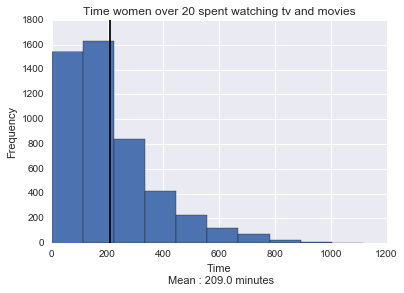

In [5]:
w_tv = round(len(w_data['TV'].unique())/len(w_data['TV'])*100)
print("{}% of women over age 20 reported spending time watching TV".format(w_tv))
w_tv = w_data[w_data['TV'] != 0]
w_tv_mean = w_tv['TV'].mean()
w_tv['TV'].plot(kind='hist', title='Time women over 20 spent watching tv and movies')
plt.xlabel("Time\n Mean : {} minutes".format(round(w_tv_mean)))
ymin, ymax = plt.ylim()
plt.vlines(w_tv_mean, 0, ymax, color='black')
plt.show()

#### Men and Television

Here we see that of all women over the age of 20, 11% reported spending some amount of time watching TV and movies.
Men spent an aver of 245 minutes a day watching television, with the vast majority of women around 200 minutes or less a day.

11% of men over age 20 reported spending time watching tv


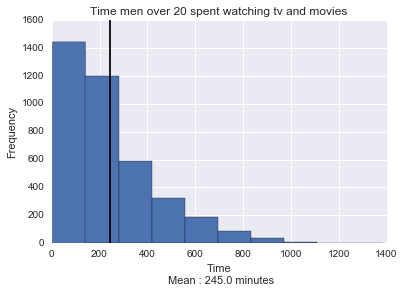

In [6]:
m_tv = round(len(m_data['TV'].unique())/len(m_data['TV'])*100)
print("{}% of men over age 20 reported spending time watching tv".format(m_tv))
m_tv_data = m_data[m_data['TV'] > 0]
m_tv_mean = m_tv_data['TV'].mean()
m_tv_data['TV'].plot(kind='hist', title='Time men over 20 spent watching tv and movies')
plt.xlabel("Time\n Mean : {} minutes".format(round(m_tv_mean)))
ymin, ymax = plt.ylim()
plt.vlines(m_tv_mean, 0, ymax, color='black')

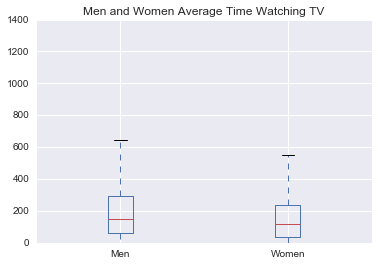

In [7]:
time_men_tv = (m_data['TV'])
time_men_tv.name = "Men"
time_women_tv = (w_data['TV'])
time_women_tv.name = "Women"
time_tv = pd.concat([time_men_tv, time_women_tv], axis = 1)
time_tv.plot(kind = 'box', title = "Men and Women Average Time Watching TV")

#### Men with Children and Television
Here we see that 18% of men over the age of 20 with at least 1 child reported spending time watching television or movies. The average amount of time spent watching television by this group was 192. The vast majority of men with at least one child reported spending less than 200 minutes a day watching television.

In [8]:
summary_cut = summary[['Age', 'Sex', 'Num_Kids', 'ID', 'read_kids', 'talk_kids', 'arts_kids', 'TV']]
m_w_kids = summary[['Age', 'Sex', 'Num_Kids', 'TV']]
m_w_kids = m_w_kids[(m_w_kids['TV'] != 0) & 
                      (m_w_kids.Sex == 1) & 
                      (m_w_kids.Age > 20) & 
                      (m_w_kids.Num_Kids > 0)]

18% of men over age 20 with at least 1 child reported 
spending time watching tv


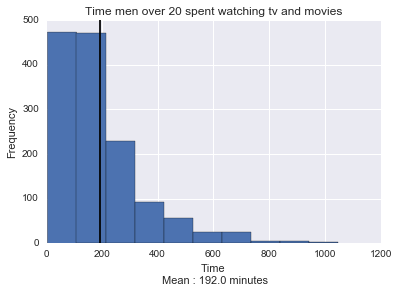

In [9]:
m_w_kids_tele = round(len(m_w_kids['TV'].unique())/len(m_w_kids['TV'])*100)
print("{}% of men over age 20 with at least 1 child reported \nspending time watching tv".format(m_w_kids_tele))
m_w_kids_tv_mean = m_w_kids['TV'].mean()
m_w_kids['TV'].plot(kind='hist', title='Time men over 20 spent watching tv and movies')
plt.xlabel("Time\n Mean : {} minutes".format(round(m_w_kids_tv_mean)))
ymin, ymax = plt.ylim()
plt.vlines(m_w_kids_tv_mean, 0, ymax, color='black')

#### Women with Children and Television
Here we see that 16% of men over the age of 20 with at least 1 child reported spending time watching television or movies. The average amount of time spent watching television by this group was 160. The vast majority of men with at least one child reported spending less than 200 minutes a day watching television.

16% of women over age 20 with at least 1 child reported 
spending time watching tv


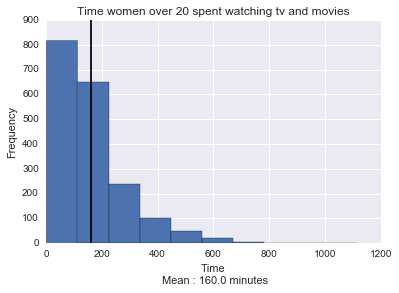

In [10]:
w_w_kids = summary[['Age', 'Sex', 'Num_Kids', 'TV']]
w_w_kids = w_w_kids[(w_w_kids['TV'] != 0) & 
                      (w_w_kids.Sex == 2) & 
                      (w_w_kids.Age > 20) & 
                      (w_w_kids.Num_Kids > 0)]
w_w_kids_tele = round(len(w_w_kids['TV'].unique())/len(w_w_kids['TV'])*100)
print("{}% of women over age 20 with at least 1 child reported \nspending time watching tv".format(w_w_kids_tele))
w_w_kids_tv_mean = w_w_kids['TV'].mean()
w_w_kids['TV'].plot(kind='hist', title='Time women over 20 spent watching tv and movies')
plt.xlabel("Time\n Mean : {} minutes".format(round(w_w_kids_tv_mean)))
ymin, ymax = plt.ylim()
plt.vlines(w_w_kids_tv_mean, 0, ymax, color='black')

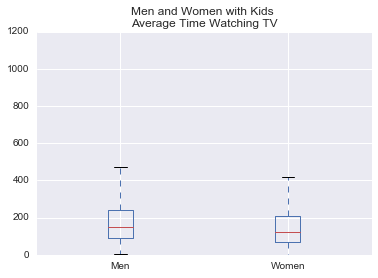

In [11]:
time_men_kids_tv = (m_w_kids['TV'])
time_men_kids_tv.name = "Men"
time_women_kids_tv = (w_w_kids['TV'])
time_women_kids_tv.name = "Women"
time_study = pd.concat([time_men_kids_tv, time_women_kids_tv], axis = 1)
time_study.plot(kind = 'box', title = "Men and Women with Kids \nAverage Time Watching TV")

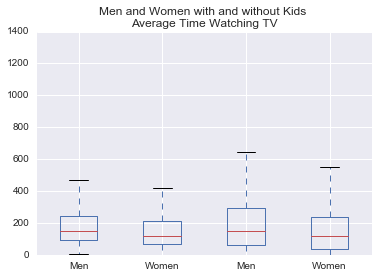

In [12]:
time_men_kids_tv = (m_w_kids['TV'])
time_men_kids_tv.name = "Men"
time_women_kids_tv = (w_w_kids['TV'])
time_women_kids_tv.name = "Women"
time_study_4 = pd.concat([time_study, time_tv], axis = 1)
time_study_4.plot(kind = 'box', title = "Men and Women with and without Kids \nAverage Time Watching TV")

#### Children and Television
Here we see a clear inverse correlation with the number of children in the household and the amount of television watched.  As the number of children go up, not only to fewer individuals report watching any amount television, but the number of minutes spent watching television clearly decreases.

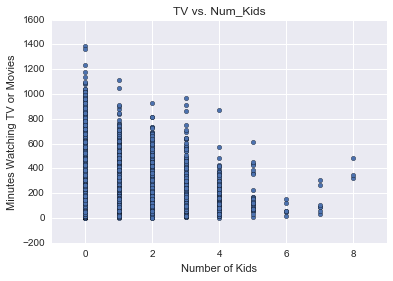

In [13]:
tv_v_kids = summary_cut[(summary_cut.TV != 0)]
tv_v_kids.plot('Num_Kids', 'TV', kind='scatter', 
                title="TV vs. Num_Kids")
plt.xlabel('Number of Kids')
plt.ylabel('Minutes Watching TV or Movies')

In [14]:
tv_kids_corr = tv_v_kids.corr()
tv_kids_corr

,Age,Sex,Num_Kids,ID,read_kids,talk_kids,arts_kids,TV
Age,1.000000,0.044816,-0.479507,-0.006664,-0.091287,-0.047120,-0.012074,0.244314
Sex,0.044816,1.000000,0.010569,-0.016202,0.041917,0.032125,0.005728,-0.096898
Num_Kids,-0.479507,0.010569,1.000000,-0.007423,0.132859,0.160675,0.029006,-0.195912
ID,-0.006664,-0.016202,-0.007423,1.000000,-0.011072,0.004444,0.004751,0.004206
read_kids,-0.091287,0.041917,0.132859,-0.011072,1.000000,0.042213,0.029528,-0.060533
talk_kids,-0.047120,0.032125,0.160675,0.004444,0.042213,1.000000,-0.001803,-0.044105
arts_kids,-0.012074,0.005728,0.029006,0.004751,0.029528,-0.001803,1.000000,-0.005026
TV,0.244314,-0.096898,-0.195912,0.004206,-0.060533,-0.044105,-0.005026,1.000000
